# Exploratory analysis 

This notebook contains code for exploratory data analysis of data used in the project: Public attitudes and ethical guidelines in digital field experiments (digex).

# TO DO

**We can roughly use the below bullet points taken from [2022-digex-study-design](https://docs.google.com/document/d/1nsaXEn04s9LTsjqrpbUpZlyQ3CAcuqkOwy1ZM0d-kKY/edit#) as section headings for this notebook to conduct the exploratory analysis**:

- To address question 1, we will provide frequency tables or plots and descriptive statistics (M, SD, range) for the variables: awareness of the fact that academic researchers use social media data, awareness of the advantages of social media data that account for why academics collect them, awareness of social media data use, and awareness of social media interaction methods. 

- To address question 2, we will provide frequency tables or plots and descriptive statistics (M, SD, range) for each of the 4 vignette studies presented in section 2 of the survey for the variable: attitudes towards actual research studies. 

- To address question 3, we will provide frequency tables or plots for the variables attitudes towards study design factors and attitudes towards ethical principles. Moreover, we will also use a mixed-methods approach to analyze open-ended free-text responses (see below).

- To further address questions 1-3, open-ended free-text inputs of both the open “other” options of selection items and the  open-ended free-text answers (i.e., what do you think it means for an academic study to receive "ethical approval”, describe any concerns you might have, what additional information about the study or the researchers that would influence your level of concern, are there any other features of research that are important for determining your level of concern, are there any additional factors that you think should be considered) will be analyzed using a mixed-methods approach to detect common topics, sentiments, and themes. 

## Set working directory

In [1]:
import pathlib   # Change cwd
import os 

path = pathlib.Path.cwd().parent
os.chdir(path)

## Imports

In [2]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Load processed data

In [ ]:
processed_data_path = get_data_filepath(
    file=config.PROCESSED_DATA_FILEPATH, 
    data_path=config.PROCESSED_DATA_DIR,
    main=False
) 

digex_df = pd.read_csv(processed_data_path, index_col=0)

digex_df.head()

The above didn't work for me (Jason), so using the below.

In [3]:
digex_df = pd.read_csv('/Users/jasonburton/Documents/GitHub/article-digex-survey/data/processed/digex-survey-responses-processed.csv', index_col=0)

digex_df.head()

,duration_sec,finished,sm_use,age,gender_id,ethnic_id,edu,politic_views,aware_sm_res,aware_sm_advan,...,rank_pub_interst,rank_add_fac_1,rank_add_fac_1_pos,rank_add_fac_2,rank_add_fac_2_pos,rank_add_fac_3,rank_add_fac_3_pos,aware_sm_advan_score,aware_sm_interact_score,aware_sm_use_score
1,912.0,True,Facebook,29.0,Male,Asian - Eastern,Highschool,Slightly liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4,0,9
2,720.0,True,Twitter,33.0,Male,Mixed race,Highschool,Neutral/ Neither conservative or liberal,Moderately aware,['… are large and can contain millions of data...,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,9
3,1874.0,True,Facebook,33.0,Female,Pacific Islander,Bachelor's degree,Very liberal,Extremely aware,['… are large and can contain millions of data...,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2,5
4,1264.0,True,Facebook,73.0,Female,White / Caucasian,Highschool,Slightly conservative,Moderately aware,['… are large and can contain millions of data...,...,1.0,NaN,8.0,NaN,NaN,NaN,NaN,1,1,6
5,556.0,True,Twitter,27.0,Female,Native-American,Highschool,Very liberal,Extremely aware,['… often capture social relationships not fou...,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0,3,9


## Exploratory data analysis

Resources:
- https://aeturrell.github.io/coding-for-economists/data-exploratory-analysis.html#the-pandas-profiling-package
- https://deepnote.com/@deepnote/Joyplot-Introduction-4666e1a3-3249-442e-9a94-2bbcc5cb1b1d

### Demographics

**Variables to examine: 0-14**

#### Age

In [4]:
print("Mean age:", digex_df['age'].mean())
print("SD age:", digex_df['age'].std())
print("Minimum age:", digex_df['age'].min())
print("Maximum age:", digex_df['age'].max())

Mean age: 41.66332665330661
SD age: 13.635931661776896
Minimum age: 18.0
Maximum age: 78.0


#### Gender

In [5]:
digex_df['gender_id'].value_counts(normalize=True, dropna=False)

Male                         0.565130
Female                       0.414830
Non-binary / third gender    0.016032
Prefer not to say            0.004008
Name: gender_id, dtype: float64

#### Ethnicity

In [6]:
digex_df['ethnic_id'].value_counts(normalize=True, dropna=False)

White / Caucasian    0.795591
African-American     0.064128
Mixed race           0.040080
Hispanic             0.038076
Asian - Eastern      0.032064
Asian - Indian       0.014028
Native-American      0.006012
Pacific Islander     0.002004
Prefer not to say    0.002004
Asian - Southeast    0.002004
Carribean            0.002004
Other                0.002004
Name: ethnic_id, dtype: float64

#### Social media use

*Note: there's an error on Qualtrics such that participants could only pick one option, instead of multiple. Since this is just a screener, we can simply note that all participants reported being a regular user of at least one of Facebook, Twitter, and/or Reddit*

In [7]:
digex_df['sm_use'].value_counts(dropna=False)

Facebook    258
Reddit      133
Twitter     108
Name: sm_use, dtype: int64

#### Political views

In [8]:
digex_df['politic_views'].value_counts(dropna=False)

Very liberal                                150
Slightly liberal                            126
Slightly conservative                        96
Neutral/ Neither conservative or liberal     89
Very conservative                            35
Prefer not to say                             3
Name: politic_views, dtype: int64

In [9]:
# proportion liberal
( (digex_df['politic_views'].value_counts()['Very liberal']) + 
(digex_df['politic_views'].value_counts()['Slightly liberal']) )/len(digex_df)

0.5531062124248497

In [10]:
# proportion conservative
( (digex_df['politic_views'].value_counts()['Very conservative']) + 
(digex_df['politic_views'].value_counts()['Slightly conservative']) )/len(digex_df)

0.2625250501002004

### Prior awareness

**Variables to examine: 8-15**

### Study descriptions

**Variables to examine: 16-27**

#### Study 1

In [11]:
digex_df['study_1_ethic_acc'].value_counts(normalize=True, dropna=False)

Completely acceptable      0.314629
Somewhat acceptable        0.288577
Somewhat unacceptable      0.162325
Neutral                    0.124248
Completely unacceptable    0.110220
Name: study_1_ethic_acc, dtype: float64

#### Study 2

In [12]:
digex_df['study_2_ethic_acc'].value_counts(normalize=True, dropna=False)

Somewhat acceptable        0.266533
Completely acceptable      0.232465
Somewhat unacceptable      0.222445
Neutral                    0.164329
Completely unacceptable    0.114228
Name: study_2_ethic_acc, dtype: float64

#### Study 3

In [13]:
digex_df['study_3_ethic_acc'].value_counts(normalize=True, dropna=False)

Completely acceptable      0.498998
Somewhat acceptable        0.268537
Neutral                    0.112224
Somewhat unacceptable      0.078156
Completely unacceptable    0.042084
Name: study_3_ethic_acc, dtype: float64

#### Study 4

In [14]:
digex_df['study_4_ethic_acc'].value_counts(normalize=True, dropna=False)

Somewhat acceptable        0.242485
Completely acceptable      0.230461
Somewhat unacceptable      0.220441
Neutral                    0.176353
Completely unacceptable    0.130261
Name: study_4_ethic_acc, dtype: float64

#### Study comparison

In [15]:
study_1_ethic_acc_num = digex_df['study_1_ethic_acc'].map({'Completely unacceptable': -2, 
                                                           'Somewhat unacceptable': -1, 
                                                           'Neutral': 0, 
                                                           'Somewhat acceptable': 1, 
                                                           'Completely acceptable': 2})
study_2_ethic_acc_num = digex_df['study_2_ethic_acc'].map({'Completely unacceptable': -2, 
                                                           'Somewhat unacceptable': -1, 
                                                           'Neutral': 0, 
                                                           'Somewhat acceptable': 1, 
                                                           'Completely acceptable': 2})
study_3_ethic_acc_num = digex_df['study_3_ethic_acc'].map({'Completely unacceptable': -2, 
                                                           'Somewhat unacceptable': -1, 
                                                           'Neutral': 0, 
                                                           'Somewhat acceptable': 1, 
                                                           'Completely acceptable': 2})
study_4_ethic_acc_num = digex_df['study_4_ethic_acc'].map({'Completely unacceptable': -2, 
                                                           'Somewhat unacceptable': -1, 
                                                           'Neutral': 0, 
                                                           'Somewhat acceptable': 1, 
                                                           'Completely acceptable': 2})

In [16]:
print("Mean Study 1 acceptance:", study_1_ethic_acc_num.mean())
print("Mean Study 2 acceptance:", study_2_ethic_acc_num.mean())
print("Mean Study 3 acceptance:", study_3_ethic_acc_num.mean())
print("Mean Study 4 acceptance:", study_4_ethic_acc_num.mean())

Mean Study 1 acceptance: 0.5350701402805611
Mean Study 2 acceptance: 0.280561122244489
Mean Study 3 acceptance: 1.1042084168336674
Mean Study 4 acceptance: 0.22244488977955912


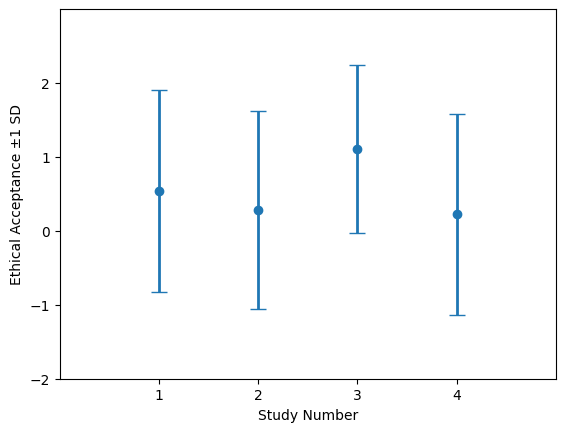

In [17]:
fig, ax = plt.subplots()

x = [1,2,3,4]
y = [study_1_ethic_acc_num.mean(), 
     study_2_ethic_acc_num.mean(),
     study_3_ethic_acc_num.mean(),
     study_4_ethic_acc_num.mean()]
yerr = [study_1_ethic_acc_num.std(), 
     study_2_ethic_acc_num.std(),
     study_3_ethic_acc_num.std(),
     study_4_ethic_acc_num.std()] 

ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)

ax.set(xlim=(0, 5), xticks=np.arange(1, 5),
       ylim=(-2, 3), yticks=np.arange(-2, 3))

plt.xlabel('Study Number') 
plt.ylabel('Ethical Acceptance ±1 SD') 

plt.show()

### Study design features

### Ethical priorities

In [18]:
ranks = digex_df[['rank_sci_repro', 'rank_resp', 'rank_just', 'rank_anony', 'rank_harms', 'rank_balance', 'rank_pub_interst']]


Ranks by means (lower value = higher priority).

In [19]:
ranks_means = ranks.mean()
ranks_means.sort_values(inplace=True, ascending=True)
ranks_means

rank_harms          2.697395
rank_anony          3.054108
rank_resp           3.527054
rank_pub_interst    3.573146
rank_just           4.651303
rank_balance        4.975952
rank_sci_repro      5.521042
dtype: float64

Ranks by Borda count (higher value = higher priority).

In [20]:
ranks_borda = ranks.replace({1:6, 2:5, 3:4, 4:3, 5:2, 6:1, 7:0})    
ranks_borda = ranks_borda.sum()
ranks_borda.sort_values(inplace=True, ascending=False)
ranks_borda

rank_harms          2147.0
rank_anony          1969.0
rank_resp           1733.0
rank_pub_interst    1710.0
rank_just           1172.0
rank_balance        1010.0
rank_sci_repro       738.0
dtype: float64